# Prediction using unsupervised ML

Author : Sreeja

Here we have provided with Iris data set and we have to predict optimum number of clusters and visualize them.

In [5]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create data set

In [3]:
#read data set
iris = pd.read_csv('C:/Users/sreej/Documents/Python Scripts/Iris.csv')


As we require sepal,petal length and width we can create new data set with only required values

In [4]:
data_set = iris.iloc[:, [1, 2, 3, 4]].values

# Predicting optimum number of clusters

We can predict the optimum number of clusters using KMeans clustering technique by calculating the inertia. 
Inertia values is the sum of squared distances of samples to their closest cluster center.
We iterate the values of i from 1 to 10 and calculate the values of inertia for each value of i  in the given range.

In [8]:
#declare an empty list to save the inertia values
inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=1234)
    kmeans.fit(data_set)
    inertia.append(kmeans.inertia_)



We have all the inertia values and now we can plot it for further analysis and we can get the optimum number of clusters using Elbow method.

Text(0.5, 1.0, 'The Elbow Method using Inertia')

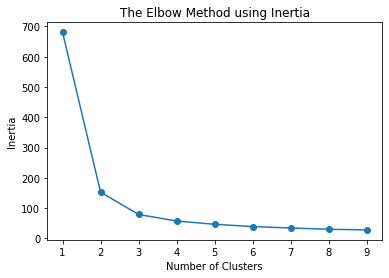

In [26]:
plt.plot(range(1,10),inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia')

To determine the optimal number of clusters, we have to select the value at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. 
Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

# Finding clusters

In [27]:
#apply KMeans algorithm and find the clusters

kmeans = KMeans(n_clusters=3,random_state=1234)
kmeans.fit(data_set)

KMeans(n_clusters=3, random_state=1234)

In [29]:
#using label_ we can find to which cluster our data points are assigned
labels = kmeans.labels_


# Visualization of clusters

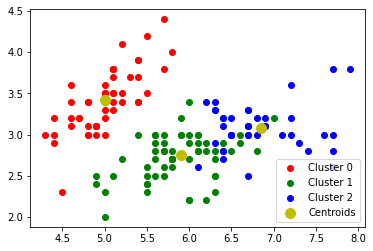

In [31]:
#visualizing the clusters
for i in range(0, data_set.shape[0]):
    if labels[i] == 0:
        cluster1 = plt.scatter(data_set[i,0],data_set[i,1],c='r') 
    elif labels[i] == 1:
        cluster2 = plt.scatter(data_set[i,0],data_set[i,1],c='g') 
    elif labels[i] == 2:
        cluster3 = plt.scatter(data_set[i,0],data_set[i,1],c='b') 
#plotting the centroids of the clusters
center = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'y')

plt.legend([cluster1, cluster2, cluster3,center],['Cluster 0', 'Cluster 1','Cluster 2','Centroids'])